In [50]:
!pip install requests pandas matplotlib
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [51]:
#Task 1: Creating a class name Company
class Company:
    def __init__(self, symbol, name):
        self.symbol = symbol
        self.name = name
        self.stock_data = None
#Task 2: Exception Handling for Data Fetching
    def download_stock_data(self, start_date, end_date):
        try:
            self.stock_data = yf.download(self.symbol, start=start_date, end=end_date)
            print("Stock data downloaded successfully for", self.symbol)
        except Exception as e:
            print("Error downloading stock data for", self.symbol)
            print(e)

#Task 3: Moving Average and Trend Analysis
    def calculate_moving_average(self, window):#Calculating the moving averages for a given window
        if self.stock_data is not None:
            self.stock_data['MA'] = self.stock_data['Close'].rolling(window=window).mean()
            return self.stock_data['MA']
        else:
            print("No stock data available for", self.symbol)
            return None
    def plot_closing_prices(self,symbol):# Plotting the closing price of the Company
        if 'Close' in self.stock_data.columns:
            self.stock_data['Close'].plot(figsize=(10, 6))
            plt.title(f'Closing Prices for {symbol}')
            plt.xlabel('Date')
            plt.ylabel('Price')
            plt.xticks(rotation=90)
            plt.grid(True)
            plt.show()
        else:
            print("Closing price data not available in the provided dataset.")

    def plot_stock_prices_with_ma(self, window):#Comparing closing price with moving average
        if self.stock_data is not None:
            plt.figure(figsize=(12, 6))
            plt.plot(self.stock_data['Close'], label='Actual Prices')
            plt.plot(self.calculate_moving_average(window), label=f'{window}-Day Moving Average')
            plt.title(f'Stock Prices and {window}-Day Moving Average for {self.symbol}')
            plt.xlabel('Date')
            plt.ylabel('Price')
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
            print("No stock data available for", self.symbol)
#Task 4: Simulate Stock Prices
    def simulate_stock_prices(self ,days): #Simulating stock price over a period of time
        returns = np.log(1+self.stock_data["Close"].pct_change())
        mu , sigma = returns.mean() , returns.std()
        simulated_returns = np.random.normal(mu,sigma,days)
        initial = self.stock_data["Close"].iloc[-1]
        simulated_prices = initial*(simulated_returns+1).cumprod()
        plt.figure(figsize=(10, 6))
        plt.axhline(initial , c= "k")
        plt.plot(simulated_prices)
        plt.title(f'Simulated Stock Price Paths for {days} days')
        plt.xlabel('Time Steps')
        plt.ylabel('Stock Price')
        plt.grid(True)
        plt.show()




[*********************100%%**********************]  1 of 1 completed


Stock data downloaded successfully for NVDA


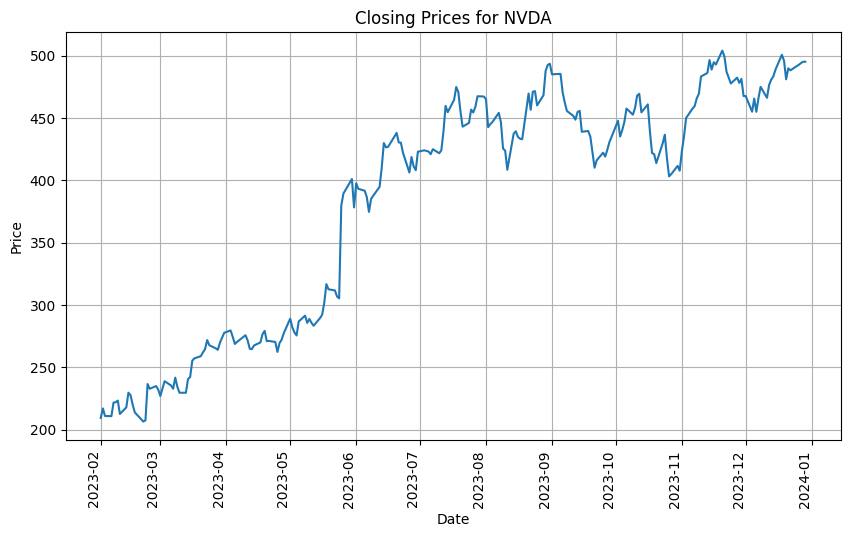

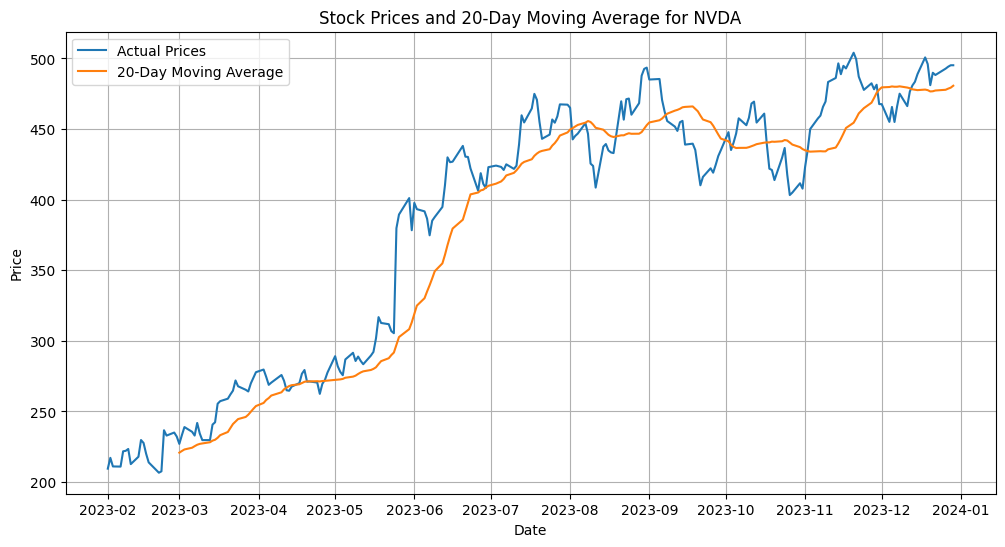

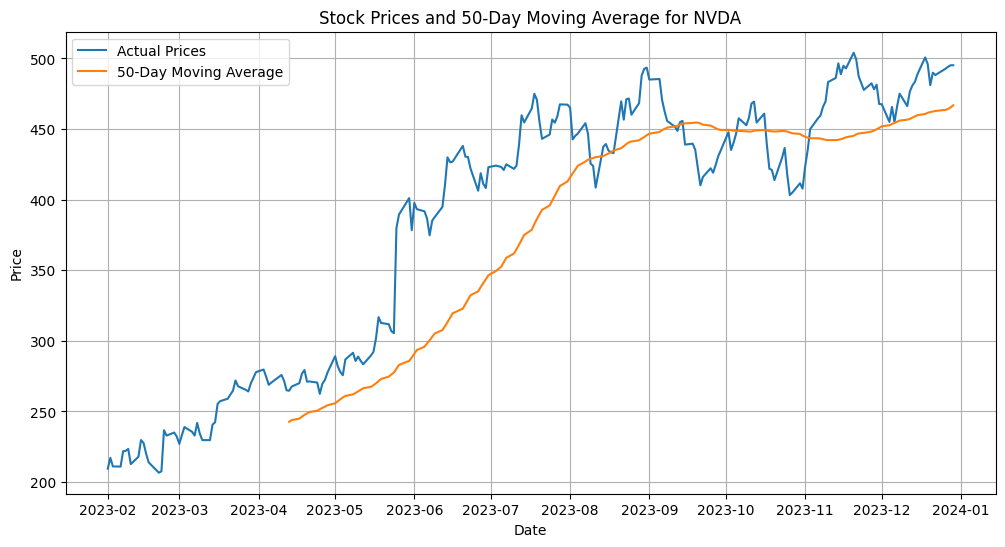

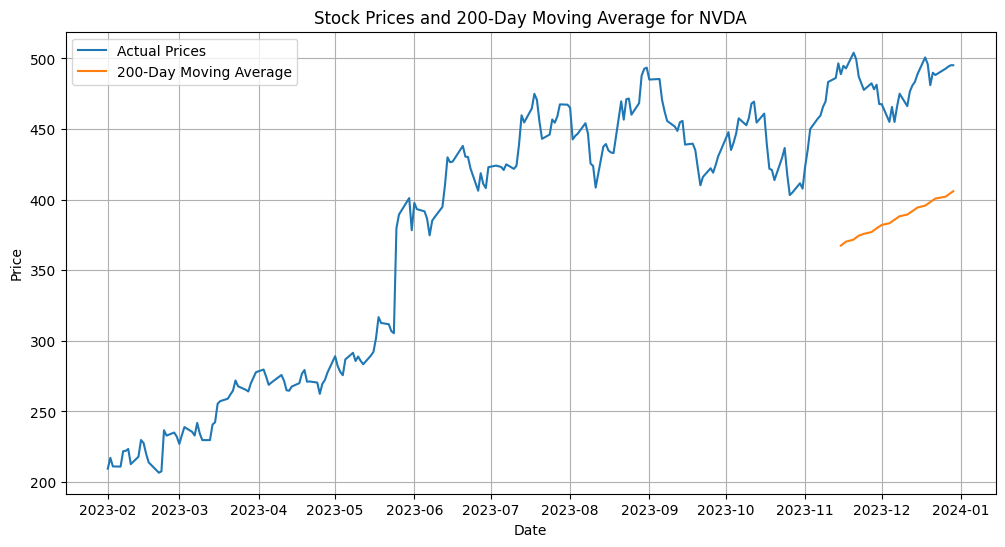

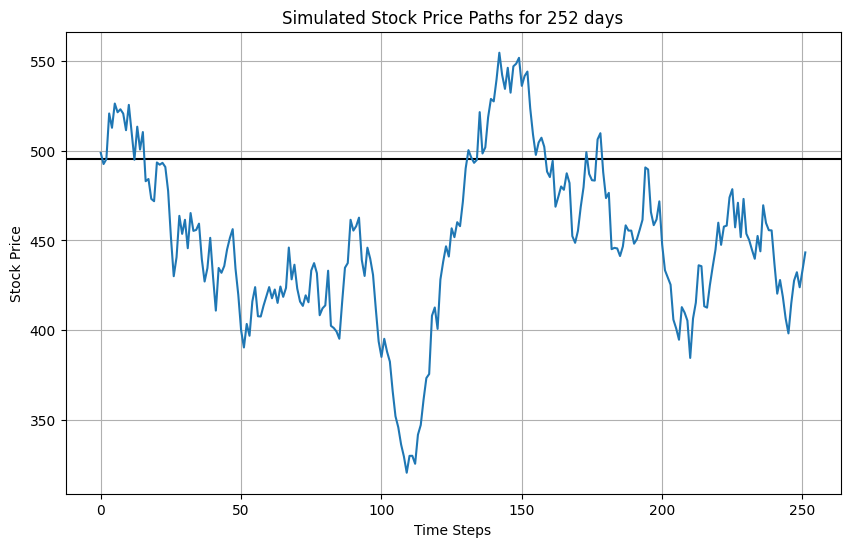

In [52]:
C1 = Company("NVDA", "Nvidia")
C1.download_stock_data('2023-02-01', '2024-01-01')
C1.plot_closing_prices("NVDA")
window = [20 ,50 ,200]
for i in range(len(window)):
    C1.plot_stock_prices_with_ma(window[i])
C1.simulate_stock_prices(252)

[*********************100%%**********************]  1 of 1 completed


Stock data downloaded successfully for AMD


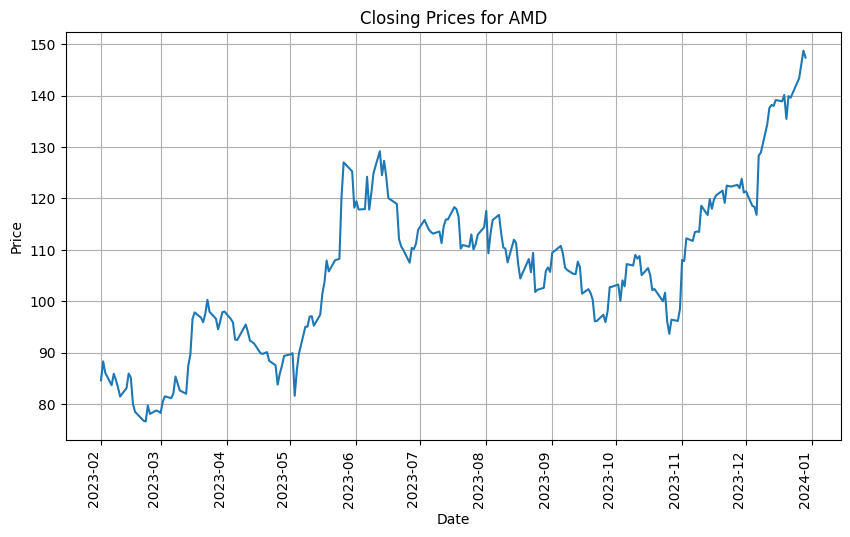

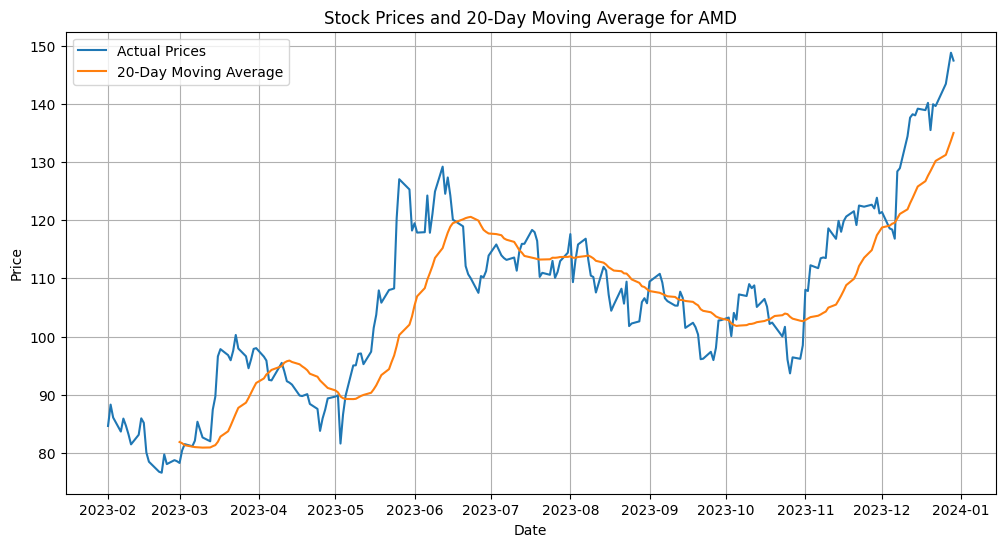

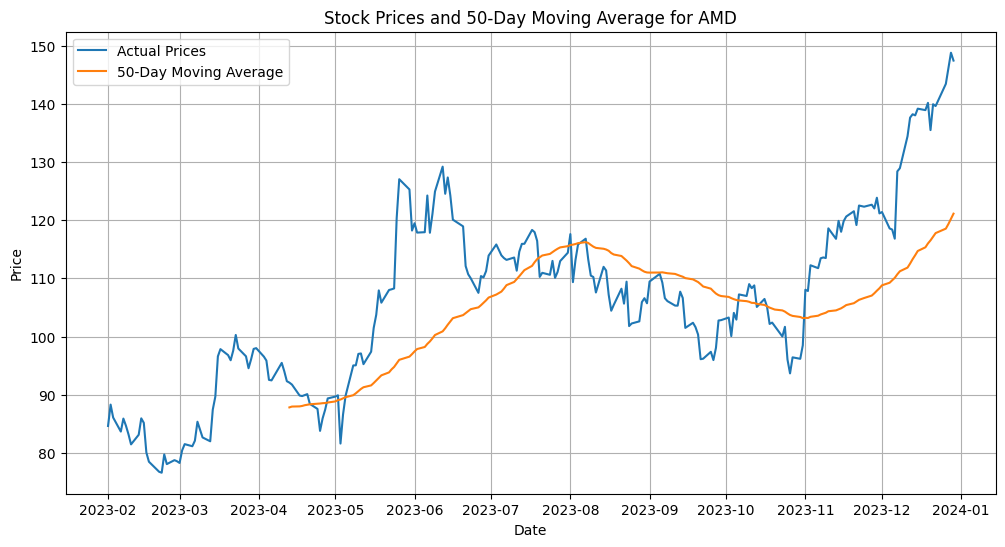

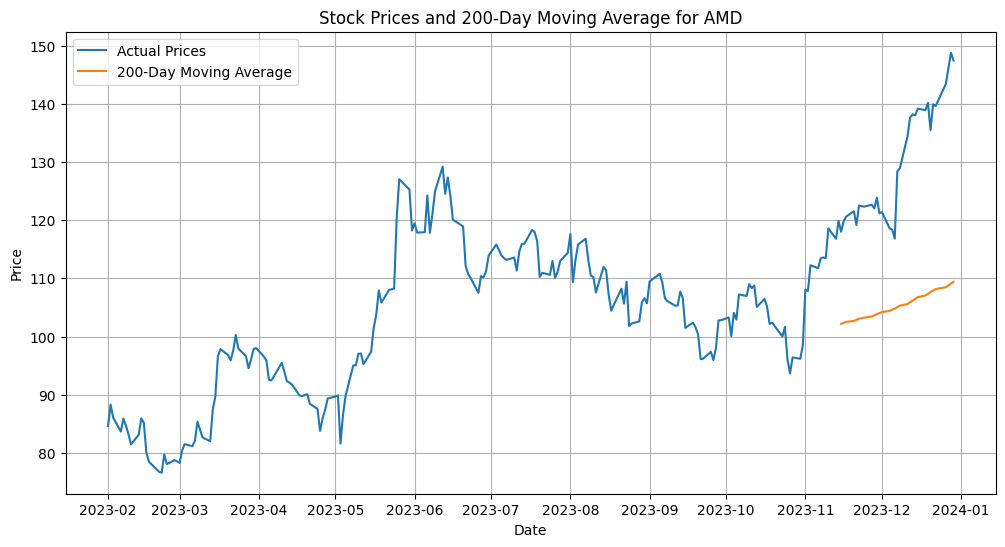

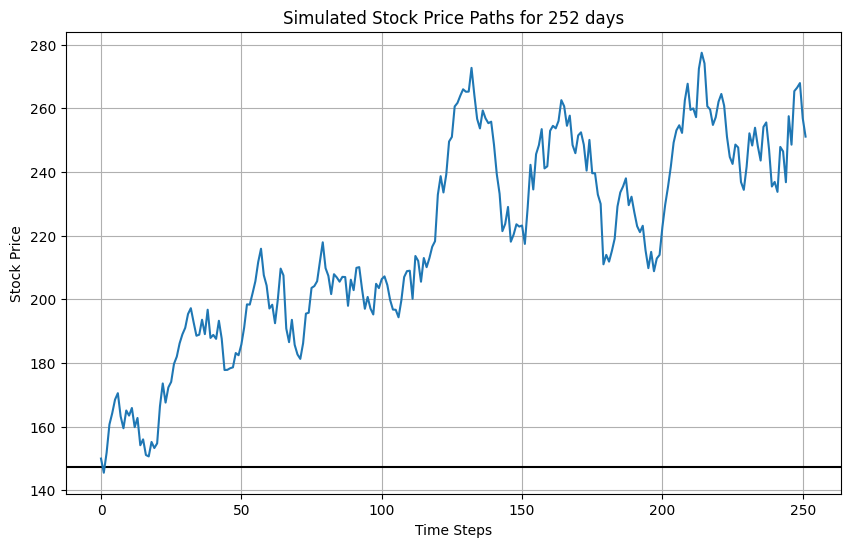

In [53]:
C2 = Company("AMD", "Advanced Micro Devices")
C2.download_stock_data('2023-02-01', '2024-01-01')
C2.plot_closing_prices("AMD")
window = [20 ,50 ,200]
for i in range(len(window)):
    C2.plot_stock_prices_with_ma(window[i])
C2.simulate_stock_prices(252)

[*********************100%%**********************]  1 of 1 completed


Stock data downloaded successfully for TSLA


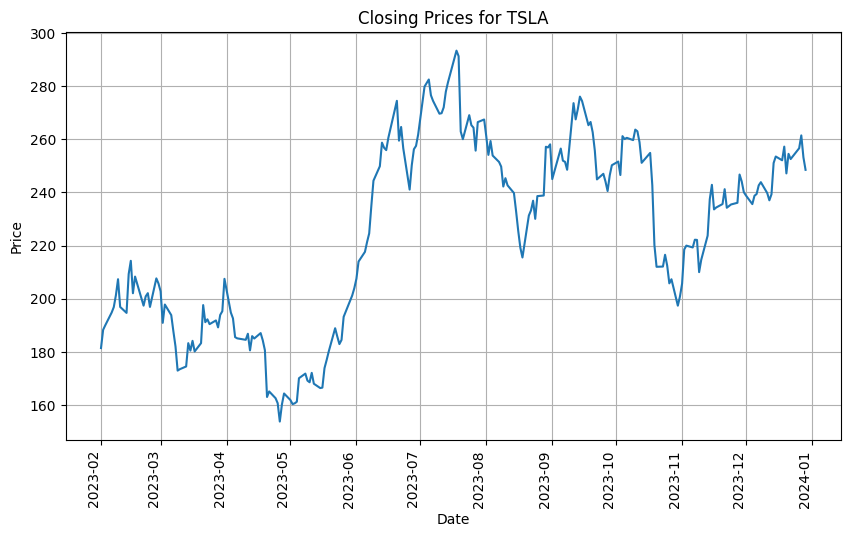

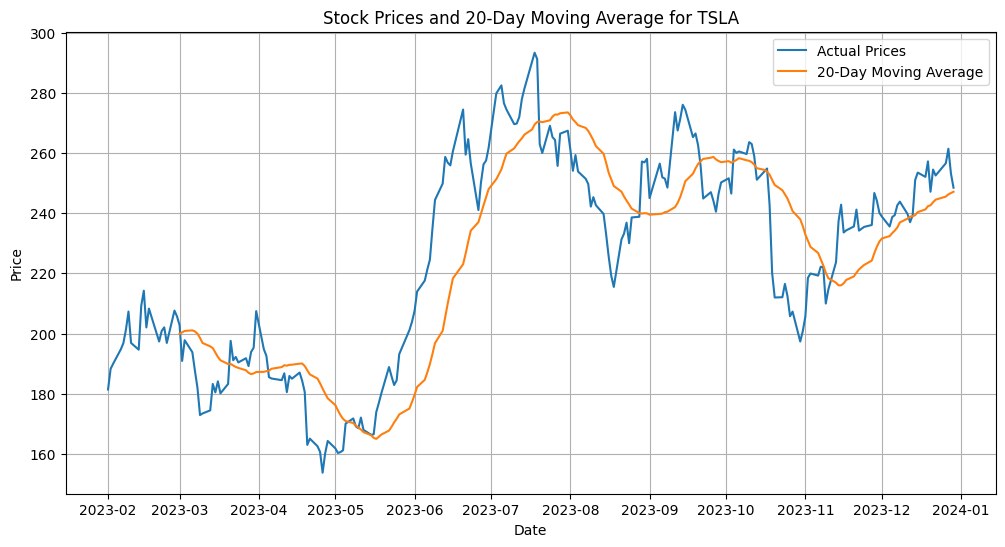

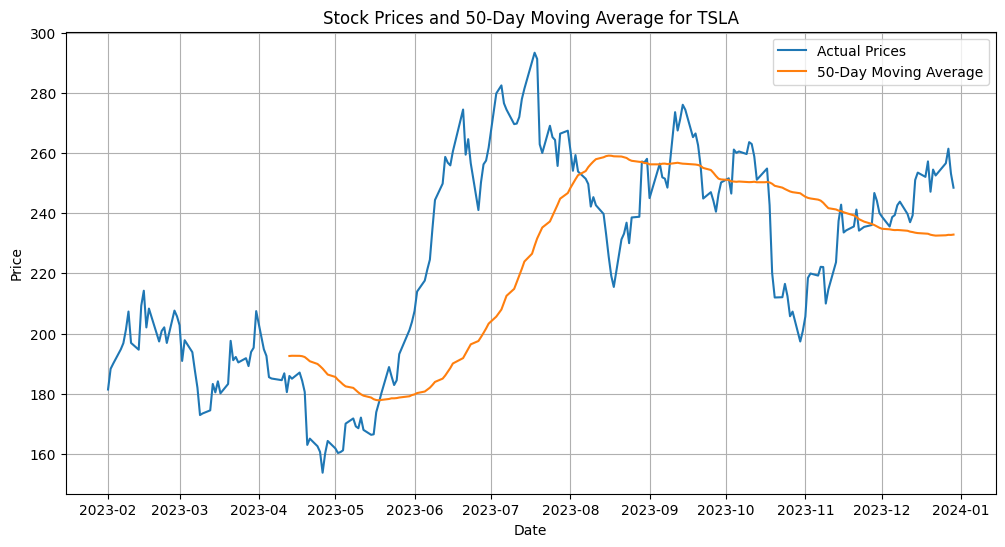

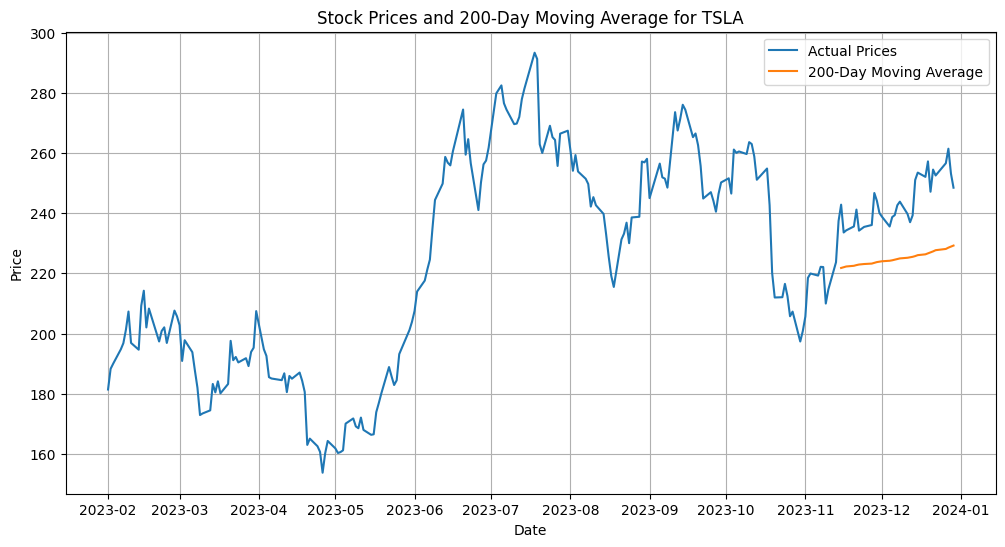

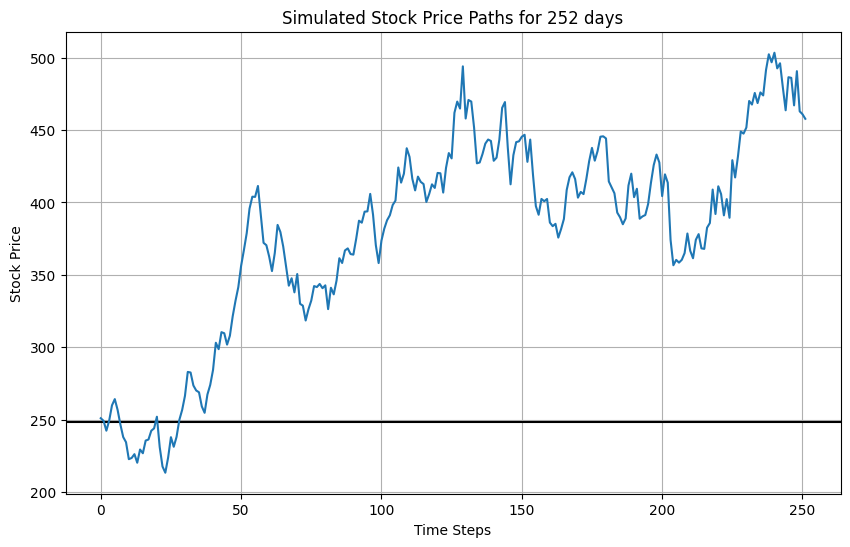

In [54]:
C3 = Company("TSLA", "TESLA")
C3.download_stock_data('2023-02-01', '2024-01-01')
C3.plot_closing_prices("TSLA")
window = [20 ,50 ,200]
for i in range(len(window)):
    C3.plot_stock_prices_with_ma(window[i])
C3.simulate_stock_prices(252)